## Zadanie 1

Proszę stworzyć zestaw punktów należących do dwóch klas: **K1** i **K2**.  Punkty z klasy **K1** powinny być losowane z rozkładu normalnego o średniej **[0, -1]** i wariancji **1**. Punkty z klasy **K2** powinny pochodzić z rozkładu normalnego o średniej **[1, 1]** i wariancji **1**. Całościowo zbiór powinien zawierać **200 punktów**, po 100 dla każdej klasy.   
Należy wybrać **zbiory uczące** o następującej liczebności: **5, 10, 20 oraz 100**.  Dla każdego wariantu podziału znalezy znaleźć równanie **prostej**, która najlepiej oddziela klasy **K1** i **K2**. Uzyskaną prostą należy
zaprezentować razem z punktami testowymi i linią (hiperpłaszczyzną), która oddziela klasy. Następnie należy ocenić to jak dobrze klasyfikator działa od proporcji danych uczących i testujących.

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import os

In [170]:
# Generowanie danych
K1 = np.random.normal(loc=[0, -1], scale=1, size=(100, 2))
K2 = np.random.normal(loc=[1, 1], scale=1, size=(100, 2))

X = np.concatenate((K1, K2))
y = [0 if i < 100 else 1 for i in range(200)]

In [171]:
# Lista rozmiarów zbioru treningowego
sizes = [5, 10, 20, 100]

Confusion matrix dla size = 5:
 [[49 50]
 [ 5 91]]
Współczynnik dokładności:  0.72
------------
Confusion matrix dla size = 10:
 [[88  6]
 [32 64]]
Współczynnik dokładności:  0.8
------------
Confusion matrix dla size = 20:
 [[82 12]
 [10 76]]
Współczynnik dokładności:  0.88
------------
Confusion matrix dla size = 100:
 [[40 13]
 [ 1 46]]
Współczynnik dokładności:  0.86
------------


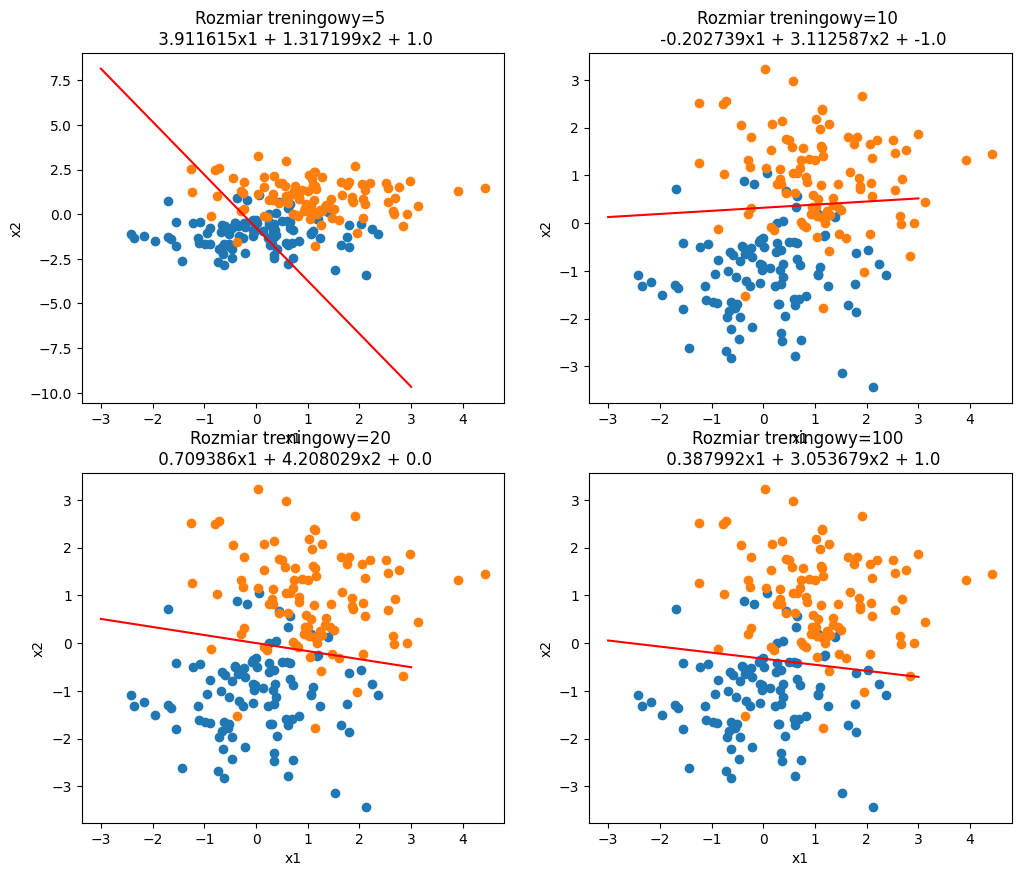

In [172]:
# Tworzenie siatki wykresów (2 kolumny, 2 wiersze)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Zwiększony obszar

for i, size in enumerate(sizes):
    # Podział na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
        X, y, test_size=(200 - size) / 200
    )

    # Trenowanie modelu perceptronu
    neuron = sk.linear_model.Perceptron()
    neuron.fit(X_train, y_train)

    # Wyznaczanie prostej decyzyjnej
    x1 = np.linspace(-3, 3, 1000)
    x2 = -(1.0 / neuron.coef_[0][1]) * (neuron.coef_[0][0] * x1 + neuron.intercept_[0])

    # Pobranie odpowiedniego podwykresu (2x2)
    ax = axes[i // 2, i % 2]

    # Rysowanie punktów
    ax.scatter(K1[:, 0], K1[:, 1], label="k1")
    ax.scatter(K2[:, 0], K2[:, 1], label="k2")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(f"Rozmiar treningowy={size} \n {round(neuron.coef_[0][0], 6)}x1 + {round(neuron.coef_[0][1], 6)}x2 + {neuron.intercept_[0]}")

    # Predykcja na zbiorze testowym
    y_pred = neuron.predict(X_test)

    # Obliczanie macierzy konfuzji i dokładności
    cm = sk.metrics.confusion_matrix(y_test, y_pred)
    accuracy = sk.metrics.accuracy_score(y_test, y_pred)
    print(f"Confusion matrix dla size = {size}:\n", cm)
    print("Współczynnik dokładności: ",round(accuracy, 2))
    print("------------")

    # Rysowanie linii decyzyjnej
    ax.plot(x1, x2, '-r')

Analizując otrzymane wyniki można dojść do wniosku, że im mniejszy zbiór testowy tym większa szansa, że program wylosuje za dużo punktów z jednej klasy co poskutkuje złym dopasowaniem prostej i niską dokładnością w przewidywaniu.

## Zadanie 2

Analiza próbek benzyny wykazała że może ona być przypisana do **dwóch klas** czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla **pięciokrotnego** uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.

In [173]:
def_path = os.getcwd()

DataFrame = pd.read_csv(f"{def_path}/data/fuel.txt", delimiter=',')
data_array = DataFrame.to_numpy()

Xf = data_array[:, :-1]
yf = np.array([0 if i == "A" else 1 for i in data_array[:, -1]])

X_min = Xf.min(axis=0)
X_max = Xf.max(axis=0)
Xf_minmax_s = (Xf- X_min) / (X_max - X_min)


accuracies = []

In [174]:
for i in range(5):

    neuronf = sk.linear_model.Perceptron(tol = 1e-3, max_iter = 20)
    neuronf.fit(Xf_minmax_s, yf)
    coef = neuronf.coef_
    print(f"Współczynniki dla iteracji: {i+1}",coef)

    yf_pred = neuronf.predict(Xf_minmax_s)
    cmf = sk.metrics.confusion_matrix(yf, yf_pred)
    print("Confusion matrix\n",cmf)
    accuracyf = sk.metrics.accuracy_score(yf, yf_pred)
    accuracies.append(accuracyf)
    print("Skuteczność ",accuracyf*100, "%")


Współczynniki dla iteracji: 1 [[ 9.55179248 -0.24120603 -0.256921  ]]
Confusion matrix
 [[38  4]
 [ 0 58]]
Skuteczność  96.0 %
Współczynniki dla iteracji: 2 [[ 9.55179248 -0.24120603 -0.256921  ]]
Confusion matrix
 [[38  4]
 [ 0 58]]
Skuteczność  96.0 %
Współczynniki dla iteracji: 3 [[ 9.55179248 -0.24120603 -0.256921  ]]
Confusion matrix
 [[38  4]
 [ 0 58]]
Skuteczność  96.0 %
Współczynniki dla iteracji: 4 [[ 9.55179248 -0.24120603 -0.256921  ]]
Confusion matrix
 [[38  4]
 [ 0 58]]
Skuteczność  96.0 %
Współczynniki dla iteracji: 5 [[ 9.55179248 -0.24120603 -0.256921  ]]
Confusion matrix
 [[38  4]
 [ 0 58]]
Skuteczność  96.0 %


Trenowanie oraz testowanie wyników 5 krotnie, jeśli za każdem razem cały zbiór danych traktujemy jako dane uczące nie przynosi żadnych korzyści ani wniosków. Za każdym razem otrzymaliśmy identyczny dobry wynik i bardzo możliwe, że nasz model mimo dobrego wyniku przeuczył się i nie jest dobrym modelem do predykcji.

## Zadanie 3

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris(). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji **80%/20%**. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

In [175]:
IrisData = sk.datasets.load_iris()
X = IrisData.data
y = IrisData.target

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
        X, y, test_size=0.2
    )

neuron = sk.linear_model.Perceptron()
neuron.fit(X_train, y_train)
coefs = neuron.coef_
y_pred = neuron.predict(X_test)
cm = sk.metrics.confusion_matrix(y_test, y_pred)
accuracy = sk.metrics.accuracy_score(y_test, y_pred)
print(f"Współczynniki dla rozmiaru zbioru testowego: {0.2*100}%\n",coefs)
print("Confusion matrix\n",cm)
print(f"Skuteczność {accuracy*100:.4f}%")

Współczynniki dla rozmiaru zbioru testowego: 20.0%
 [[  1.8   4.8  -7.2  -2.5]
 [ 26.  -33.    5.8 -31.7]
 [-44.1 -38.3  53.1  47.6]]
Confusion matrix
 [[ 0 13  0]
 [ 0 10  0]
 [ 0  7  0]]
Skuteczność 33.3333%


Perceptron to jeden z prostszych rodzajów sieci neuronowych, który działa dobrze dla problemów liniowo separowalnych, czyli 0/1. Natomiast zbiór danych irysów nie posiada danych, które można byłoby tak odseparować. Perceptron znajduje liniową granicę decyzyjną i po odpaleniu algorytmu wiele razy można zauważyć, że gatunek **serosa** jest najczęściej poprawnie odnajdywanym gatunkiem. (pierwszy wiersz i pierwsza kolumna macierzy pomyłek)
Powodem takiego stanu rzeczy jest fakt, że dane na temat tego gatunku są liniowo separowalne od pozostałych klas. W dodatku klasy **versicolor** i **vriginica** nie są takie łatwe do odseparowania, gdyż ich dane są bardziej pomieszane ze sobą w przestrzeni.  
Według mojego rozumowania pojedyńcza warstwa perceptronów powinna uzyskiwać wynik w okolicach 60-70%, ponieważ gatunek **serosa** odróżni z łatwościa, natomiast z rozróżnieniem pozostałych dwóch gatunków będzie miała problem i większość z nich sklasyfikuje jako jeden z nich. 33% + ~33% = +-66%  

## Zadanie 4

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

In [176]:
for test_size in [0.05, 0.20, 0.5, 0.7, 0.95]:
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
        X, y, test_size=test_size
    )
    neuron = sk.linear_model.Perceptron()
    neuron.fit(X_train, y_train)
    coefs = neuron.coef_
    y_pred = neuron.predict(X_test)
    cm = sk.metrics.confusion_matrix(y_test, y_pred)
    accuracy = sk.metrics.accuracy_score(y_test, y_pred)
    print(f"Współczynniki dla rozmiaru zbioru testowego: {test_size*100}%\n",coefs)
    print("Confusion matrix\n",cm)
    print("Skuteczność ",accuracy*100, "%")
    print("------------")


Współczynniki dla rozmiaru zbioru testowego: 5.0%
 [[  1.9   4.1  -6.3  -2.9]
 [ 15.8 -35.9   7.4 -37.4]
 [-37.5 -30.5  49.   47.9]]
Confusion matrix
 [[4 0 0]
 [1 1 0]
 [1 0 1]]
Skuteczność  75.0 %
------------
Współczynniki dla rozmiaru zbioru testowego: 20.0%
 [[  1.5   4.4  -7.6  -3.8]
 [ 12.9 -37.4   6.8 -29.4]
 [-24.3 -21.6  36.6  33.6]]
Confusion matrix
 [[ 8  0  0]
 [ 4  1  4]
 [ 0  0 13]]
Skuteczność  73.33333333333333 %
------------
Współczynniki dla rozmiaru zbioru testowego: 50.0%
 [[  1.5   5.8  -7.4  -3.3]
 [  4.6 -23.3  -3.2 -12.9]
 [-27.1 -21.1  41.3  26.2]]
Confusion matrix
 [[27  0  0]
 [18  0  5]
 [ 0  0 25]]
Skuteczność  69.33333333333334 %
------------
Współczynniki dla rozmiaru zbioru testowego: 70.0%
 [[  0.8   4.8  -8.6  -3.1]
 [  3.  -10.1  11.2  -2.9]
 [-12.1 -15.   20.4  15.8]]
Confusion matrix
 [[34  0  0]
 [ 0 39  0]
 [ 0 32  0]]
Skuteczność  69.52380952380952 %
------------
Współczynniki dla rozmiaru zbioru testowego: 95.0%
 [[ 8.8817842e-16  7.3000000e+00

Rozmiaru zbioru uczącego ma duży wpływ na wyniki.
Jeśli zbiór uczący jest zbyt duży to zostaje nam za mało danych, aby poprawnieć ocenić skuteczność naszego modelu, co skutkuje bardzo zróżnicowanymi wynikami przy kilku iteracjach.
Jeśli zbiór uczący jest zbyt mały to model może nie do końca nauczyć się i poprawnie separować klasy od siebie, co skutkuje niższą skutecznością.
Okazuje się, że w naszym przypadku najbardziej optymalnym podziałem był podział pół na pół, który dawał stabilne wyniki. Model ten miał wystarczająco dużo danych aby się nauczyć jak i również odpowiednią ich ilość aby sprawdzić swoją skuteczność.

# Zadanie 5

Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego sprawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

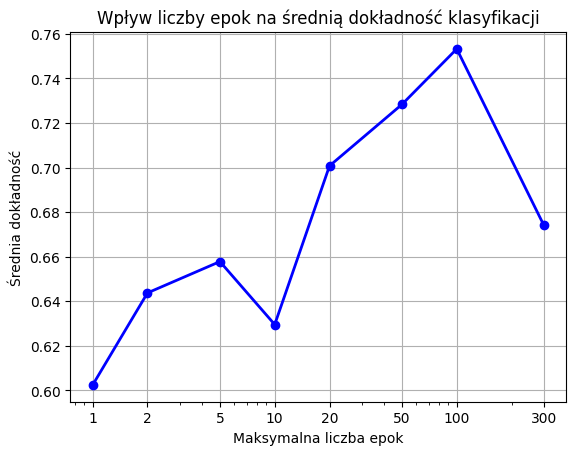

Liczba epok: 1, Średnia dokładność: 60.24%
Liczba epok: 2, Średnia dokładność: 64.37%
Liczba epok: 5, Średnia dokładność: 65.78%
Liczba epok: 10, Średnia dokładność: 62.95%
Liczba epok: 20, Średnia dokładność: 70.08%
Liczba epok: 50, Średnia dokładność: 72.83%
Liczba epok: 100, Średnia dokładność: 75.32%
Liczba epok: 300, Średnia dokładność: 67.43%


In [177]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

IrisData = sk.datasets.load_iris()
X = IrisData.data
y = IrisData.target

epochs_list = [1, 2, 5, 10, 20, 50, 100, 300]

test_sizes = [0.15, 0.30, 0.5, 0.65, 0.8]

accuracies_for_epochs = []

for epochs in epochs_list:
    accuracies = []

    for test_size in test_sizes:
        test_accuracies = []

        for _ in range(5):
            X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=test_size, random_state=None)

            perceptron = sk.linear_model.Perceptron(max_iter=epochs, early_stopping=False, tol=1e-35)

            perceptron.fit(X_train, y_train)
            y_pred = perceptron.predict(X_test)
            accuracy = sk.metrics.accuracy_score(y_test, y_pred)
            test_accuracies.append(accuracy)

        accuracies.append(np.mean(test_accuracies))

    accuracies_for_epochs.append(np.mean(accuracies))

plt.plot(epochs_list, accuracies_for_epochs, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.xscale('log')
plt.xticks(epochs_list, epochs_list)
plt.title('Wpływ liczby epok na średnią dokładność klasyfikacji')
plt.xlabel('Maksymalna liczba epok')
plt.ylabel('Średnia dokładność')
plt.grid(True)
plt.show()

for epochs, accuracy in zip(epochs_list, accuracies_for_epochs):
    print(f"Liczba epok: {epochs}, Średnia dokładność: {accuracy*100:.2f}%")


Po otrzymanych wynikach można dojść do dosyć prostego wniosku, iż bardzo mała ilość epok podczas uczenia znacząco obniża skuteczność naszego modelu. Co więcej większa ilość epok wcale nie gwarantuje lepszego wyniku co widać na załączonym wykresie.